In [1]:
import os
import sys

repo_root = os.path.abspath(os.path.join(os.getcwd(), "../"))
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import dask

from preprocessing import read

### Premier tests

#### Load and get data

In [2]:
# url = "https://object.files.data.gouv.fr/meteofrance-drias/SocleM-Climat-2025/CPRCM/METROPOLE/ALPX-3/CNRM-ESM2-1/r1i1p1f2/CNRM-AROME46t1/ssp370/day/tasAdjust/version-hackathon-102025/tasAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1991-2020_day_20150101-21001231.nc"

# file_path = r"../Data/tasAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1991-2020_day_20150101-21001231.nc"

# ds = xr.open_dataset(file_path)

# print(ds)


file_path = "../data_perso/tasAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1991-2020_day_20150101-21001231.nc"

ds = xr.open_dataset(file_path, chunks={"time": 100})

https://object.files.data.gouv.fr/meteofrance-drias/SocleM-Climat-2025/CPRCM/METROPOLE/ALPX-3/CNRM-ESM2-1/r1i1p1f2/CNRM-AROME46t1/ssp370/day/tasAdjust/version-hackathon-102025/tasAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1991-2020_day_20150101-21001231.nc


tasAdjust_FR-Metro_MPI-ESM1-2-LR_historical_r1i1p1f1_CNRM_CNRM-ALADIN63-emul-CNRM-UNET11-tP22_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_18500101-20141231.nc


https://object.files.data.gouv.fr/meteofrance-drias/SocleM-Climat-2025/EMULATEUR/METROPOLE/ALPX-12/MPI-ESM1-2-LR/r1i1p1f1/CNRM-ALADIN63-emul-CNRM-UNET11-tP22/historical/day/prAdjust/version-hackathon-102025/prAdjust_FR-Metro_MPI-ESM1-2-LR_historical_r1i1p1f1_CNRM_CNRM-ALADIN63-emul-CNRM-UNET11-tP22_v1-r1_MF-CDFt-SAFRAN-1985-2014_day_18500101-20141231.nc


https://object.files.data.gouv.fr/meteofrance-drias/SocleM-Climat-2025/CPRCM/METROPOLE/ALPX-3/CNRM-ESM2-1/r1i1p1f2/CNRM-AROME46t1/historical/day/tasAdjust/version-hackathon-102025/
tasAdjust_FR-Metro_CNRM-ESM2-1_historical_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_19900101-19991231.nc


#### turn into data array

In [3]:
print(ds.data_vars)

Data variables:
    lon_bnds        (y, x, nbounds) float64 613kB dask.array<chunksize=(134, 143, 4), meta=np.ndarray>
    lat_bnds        (y, x, nbounds) float64 613kB dask.array<chunksize=(134, 143, 4), meta=np.ndarray>
    LambertParisII  int32 4B ...
    tasAdjust       (time, y, x) float32 2GB dask.array<chunksize=(100, 134, 143), meta=np.ndarray>
    time_bnds       (time, bnds) datetime64[ns] 503kB dask.array<chunksize=(100, 2), meta=np.ndarray>


In [4]:
da = ds["tasAdjust"]

In [5]:
print(da)
print(type(da))


<xarray.DataArray 'tasAdjust' (time: 31411, y: 134, x: 143)> Size: 2GB
dask.array<open_dataset-tasAdjust, shape=(31411, 134, 143), dtype=float32, chunksize=(100, 134, 143), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 251kB 2015-01-01T12:00:00 ... 2100-12-31T1...
  * y        (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * x        (x) float64 1kB 6e+04 6.8e+04 7.6e+04 ... 1.188e+06 1.196e+06
    lon      (y, x) float64 153kB dask.array<chunksize=(134, 143), meta=np.ndarray>
    lat      (y, x) float64 153kB dask.array<chunksize=(134, 143), meta=np.ndarray>
Attributes:
    standard_name:          air_temperature
    long_name:              Bias Corrected Near-Surface Air Temperature
    units:                  K
    grid_mapping:           LambertParisII
    cell_methods:           time: mean
    coverage_content_type:  derivedData
    units_metadata:         temperature: on_scale
<class 'xarray.core.dataarray.DataArray'>


In [6]:
print(da.shape)
print(da.dims)



(31411, 134, 143)
('time', 'y', 'x')


#### Getting all time series for one lat lon

In [7]:
lat_target = 45.5
lon_target = 6.2

In [8]:
#point_ts = da.sel(lat=lat_target, lon=lon_target, method="nearest")

In [9]:
da_first = da.isel(time=0).compute()

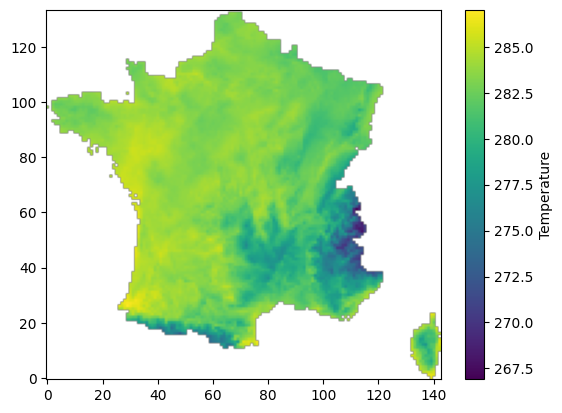

In [10]:
plt.imshow(da_first, origin='lower')
plt.colorbar(label='Temperature')
plt.show()

In [11]:
da_rand = da.isel(time=1234).compute()


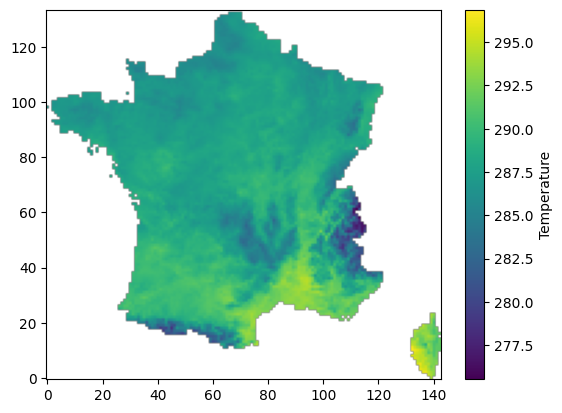

In [12]:
plt.imshow(da_rand, origin='lower')
plt.colorbar(label='Temperature', cmap='jet')
plt.show()

In [13]:
y_idx = 60  # replace with your chosen y index
x_idx = 80  # replace with your chosen x index
# point_ts is a DataArray of shape (time,)
point_ts = da[:, y_idx, x_idx].compute()  # compute loads only this 1D array


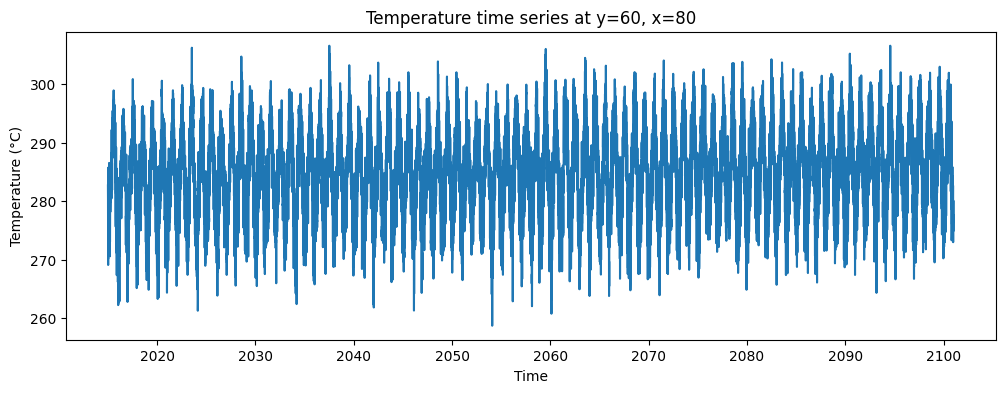

In [14]:
plt.figure(figsize=(12,4))
plt.plot(point_ts.time, point_ts.values)
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature time series at y={y_idx}, x={x_idx}")
plt.show()

In [15]:
lats = ds["lat"].values   # 2D array of latitudes
lons = ds["lon"].values   # 2D array of longitudes

print(lats.shape, lons.shape)  # should match (y, x)
print(lats, lons)              # shows all values


(134, 143) (134, 143)
[[41.361 41.367 41.373 ... 41.331 41.325 41.318]
 [41.433 41.439 41.444 ... 41.402 41.396 41.39 ]
 [41.504 41.51  41.516 ... 41.474 41.468 41.461]
 ...
 [50.742 50.749 50.756 ... 50.706 50.699 50.691]
 [50.814 50.821 50.827 ... 50.778 50.77  50.762]
 [50.885 50.892 50.899 ... 50.849 50.841 50.834]] [[-4.09690905 -4.00201368 -3.90709972 ...  9.24429703  9.33907509
   9.43383408]
 [-4.10470295 -4.00969362 -3.91466594 ...  9.25265789  9.34755039
   9.44242191]
 [-4.11251593 -4.01739264 -3.92225051 ...  9.26103973  9.35604572
   9.45103168]
 ...
 [-5.30820227 -5.19564533 -5.0830574  ... 10.54347706 10.65583897
  10.7681675 ]
 [-5.31920004 -5.20648289 -5.09373474 ... 10.5552702  10.66779137
  10.78027821]
 [-5.33022928 -5.21735191 -5.10444307 ... 10.56709671 10.67977715
  10.7924242 ]]


In [16]:
print("Latitude:", lats[y_idx, x_idx])
print("Longitude:", lons[y_idx, x_idx])


Latitude: 45.866
Longitude: 3.62440896034241


#### temp a paris

In [17]:
# Target coordinates Paris
lat_target = 43.3026
lon_target = 5.3691

# Compute distance squared to every grid cell
dist2 = (ds["lat"].values - lat_target)**2 + (ds["lon"].values - lon_target)**2

# Find indices of the minimum distance
y_idx, x_idx = np.unravel_index(np.argmin(dist2), dist2.shape)

print("Nearest grid cell:", y_idx, x_idx)
print("Latitude, Longitude:", ds["lat"].values[y_idx, x_idx], ds["lon"].values[y_idx, x_idx])

Nearest grid cell: 25 98
Latitude, Longitude: 43.313 5.33991193771362


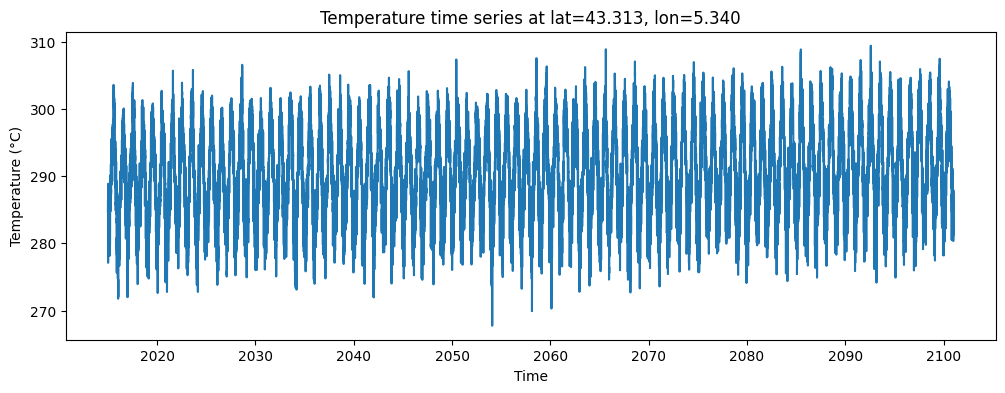

In [18]:
# Extract time series for that grid cell
point_ts = da[:, y_idx, x_idx].compute()

# Plot
plt.figure(figsize=(12,4))
plt.plot(point_ts.time, point_ts.values)
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature time series at lat={ds['lat'].values[y_idx, x_idx]:.3f}, lon={ds['lon'].values[y_idx, x_idx]:.3f}")
plt.show()


In [19]:
time_index = pd.to_datetime(point_ts.time.values)


2100-01-01 12:00:00    287.935150
2100-01-02 12:00:00    287.945251
2100-01-03 12:00:00    287.076355
2100-01-04 12:00:00    283.696808
2100-01-05 12:00:00    284.146606
                          ...    
2100-12-27 12:00:00    280.337585
2100-12-28 12:00:00    282.216766
2100-12-29 12:00:00    287.937683
2100-12-30 12:00:00    282.166565
2100-12-31 12:00:00    281.278870
Length: 365, dtype: float32


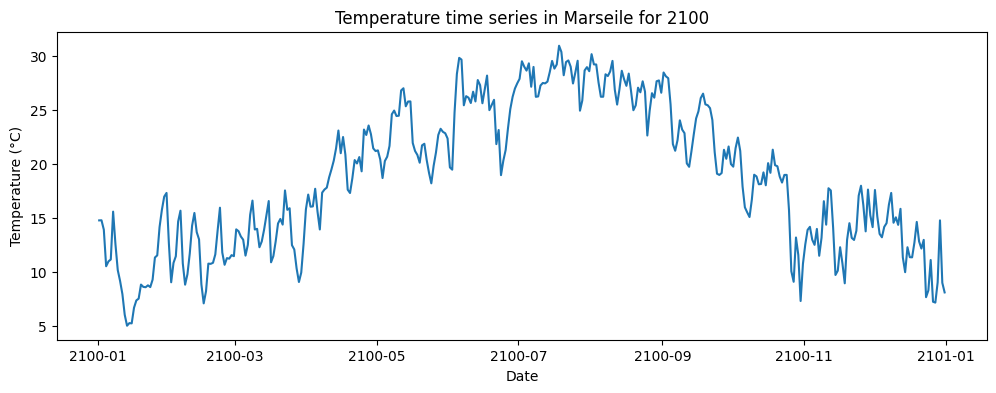

In [20]:
year = 2100


# Create a pandas Series with time as index
ts = pd.Series(point_ts.values, index=time_index)

# Select only data for 2015
ts_year = ts[ts.index.year == year]
ts_year_c = ts_year - 273.15

print(ts_year)
plt.figure(figsize=(12,4))
plt.plot(ts_year_c.index, ts_year_c.values)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature time series in Marseile for {year}")
plt.show()

2015-01-01 12:00:00    284.623871
2015-01-02 12:00:00    286.135468
2015-01-03 12:00:00    286.414215
2015-01-04 12:00:00    286.373444
2015-01-05 12:00:00    281.149658
                          ...    
2015-12-27 12:00:00    284.056641
2015-12-28 12:00:00    283.259399
2015-12-29 12:00:00    283.089722
2015-12-30 12:00:00    282.140381
2015-12-31 12:00:00    281.433716
Length: 365, dtype: float32


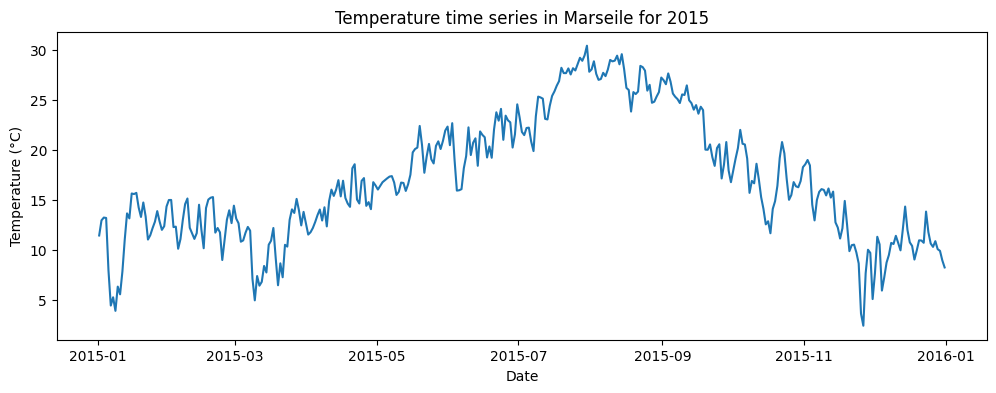

In [21]:
year = 2015


# Create a pandas Series with time as index
ts = pd.Series(point_ts.values, index=time_index)

# Select only data for 2015
ts_year = ts[ts.index.year == year]
ts_year_c = ts_year - 273.15

print(ts_year)
plt.figure(figsize=(12,4))
plt.plot(ts_year_c.index, ts_year_c.values)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature time series in Marseile for {year}")
plt.show()

### Tests fusion DF

In [2]:
path = '../data_perso/'
prfile1 = 'prAdjust_FR-Metro_MPI-ESM1-2-LR_historical_r1i1p1f1_CNRM_CNRM-ALADIN63-emul-CNRM-UNET11-tP22_v1-r1_MF-CDFt-SAFRAN-1985-2014_day_18500101-20141231.nc'
prfile2 = 'prAdjust_FR-Metro_MPI-ESM1-2-LR_ssp370_r1i1p1f1_CNRM_CNRM-ALADIN63-emul-CNRM-UNET11-tP22_v1-r1_MF-CDFt-SAFRAN-1985-2014_day_20150101-21001231.nc'
tasfile1 = 'tasAdjust_FR-Metro_MPI-ESM1-2-LR_historical_r1i1p1f1_CNRM_CNRM-ALADIN63-emul-CNRM-UNET11-tP22_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_18500101-20141231.nc'
tasfile2 = 'tasAdjust_FR-Metro_MPI-ESM1-2-LR_ssp370_r1i1p1f1_CNRM_CNRM-ALADIN63-emul-CNRM-UNET11-tP22_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_20150101-21001231.nc'
ds_hist = read.read_nc_files([(path+prfile1, 'prAdjust'), (path+tasfile1, 'tasAdjust')])
ds_ssp370 = read.read_nc_files([(path+prfile2, 'prAdjust'), (path+tasfile2, 'tasAdjust')])
# dspr = xr.open_dataset(file_path_emul_pr, chunks={"time": 100})
# dstas = xr.open_dataset(file_path_emul_tas, chunks={"time": 100})

In [3]:
ds_hist

<xarray.Dataset> Size: 9GB
Dimensions:         (y: 134, x: 143, time: 60265)
Coordinates:
  * y               (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * x               (x) float64 1kB 6e+04 6.8e+04 ... 1.188e+06 1.196e+06
  * time            (time) datetime64[ns] 482kB 1850-01-01T12:00:00 ... 2014-...
    LambertParisII  int64 8B 0
    lon             (y, x) float64 153kB dask.array<chunksize=(134, 143), meta=np.ndarray>
    lat             (y, x) float64 153kB dask.array<chunksize=(134, 143), meta=np.ndarray>
Data variables:
    prAdjust        (time, y, x) float32 5GB dask.array<chunksize=(100, 134, 143), meta=np.ndarray>
    tasAdjust       (time, y, x) float32 5GB nan nan nan nan ... nan nan nan nan

In [4]:
ds_ssp370

<xarray.Dataset> Size: 5GB
Dimensions:         (y: 134, x: 143, time: 31411)
Coordinates:
  * y               (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * x               (x) float64 1kB 6e+04 6.8e+04 ... 1.188e+06 1.196e+06
  * time            (time) datetime64[ns] 251kB 2015-01-01T12:00:00 ... 2100-...
    LambertParisII  int64 8B 0
    lon             (y, x) float64 153kB dask.array<chunksize=(134, 143), meta=np.ndarray>
    lat             (y, x) float64 153kB dask.array<chunksize=(134, 143), meta=np.ndarray>
Data variables:
    prAdjust        (time, y, x) float32 2GB dask.array<chunksize=(100, 134, 143), meta=np.ndarray>
    tasAdjust       (time, y, x) float32 2GB nan nan nan nan ... nan nan nan nan

In [5]:
def concat_datasets(ds1,ds2):
    """Concat two xarray datasets along the time dimension."""
    return xr.concat([ds1, ds2], dim="time")

In [6]:
ds_concat = concat_datasets(ds_hist,ds_ssp370)

In [7]:
ds_final = ds_concat.sel(time=ds_concat.time.dt.year >= 1972)


In [8]:
print(ds_final.time.min().values)
print(ds_final.time.max().values)


1972-01-01T12:00:00.000000000
2100-12-31T12:00:00.000000000


In [9]:
# Convert the time coordinate to a pandas index
time_index = ds_final.indexes['time']

# Find duplicated timestamps
duplicates = time_index[time_index.duplicated()]
print(duplicates)


DatetimeIndex([], dtype='datetime64[ns]', name='time', freq=None)


In [10]:
ds_final

<xarray.Dataset> Size: 7GB
Dimensions:         (time: 47117, y: 134, x: 143)
Coordinates:
  * time            (time) datetime64[ns] 377kB 1972-01-01T12:00:00 ... 2100-...
  * y               (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * x               (x) float64 1kB 6e+04 6.8e+04 ... 1.188e+06 1.196e+06
    LambertParisII  int64 8B 0
    lon             (y, x) float64 153kB -4.097 -4.002 -3.907 ... 10.68 10.79
    lat             (y, x) float64 153kB 41.36 41.37 41.37 ... 50.85 50.84 50.83
Data variables:
    prAdjust        (time, y, x) float32 4GB dask.array<chunksize=(99, 134, 143), meta=np.ndarray>
    tasAdjust       (time, y, x) float32 4GB nan nan nan nan ... nan nan nan nan

##### write file

In [11]:
ds_final.to_netcdf("tas_pr_1972_2100.nc")

#### Prework

In [23]:
print(dspr.time.equals(dstas.time))
print(dspr.lat.equals(dstas.lat))
print(dspr.lon.equals(dstas.lon))


True
False
False


In [3]:
dspr2 = dspr.assign_coords(lon=dstas.lon, lat=dstas.lat)

# ds_merged = xr.merge([dspr, dstas], compat="override")


In [4]:
dspr2 = dspr2.assign_coords(time=dstas.time)


In [5]:
ds_merged = xr.merge([dspr2, dstas])

C:\Users\jules\AppData\Local\Temp\ipykernel_13780\2236069012.py:1: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds_merged = xr.merge([dspr2, dstas])
C:\Users\jules\AppData\Local\Temp\ipykernel_13780\2236069012.py:1: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds_merged = xr.merge([dspr2, dstas])
C:\Users\jules\AppData\Local\Temp\ip

In [6]:
ds_merged_tas = ds_merged["tasAdjust"]
ds_merged_pr = ds_merged["prAdjust"]

In [8]:
ds_merged_tas_first = ds_merged_tas.isel(time=0).compute()
ds_merged_pr_first = ds_merged_pr.isel(time=0).compute()

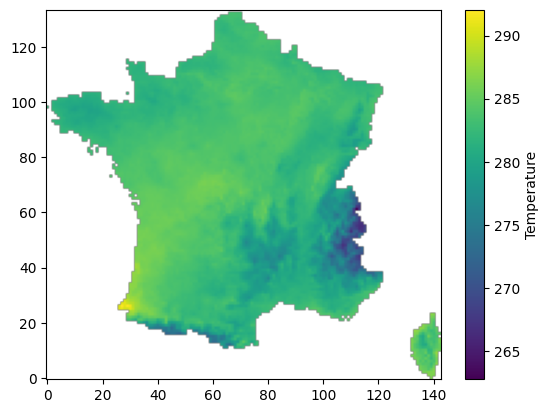

In [9]:
plt.imshow(ds_merged_tas_first, origin='lower')
plt.colorbar(label='Temperature')
plt.show()

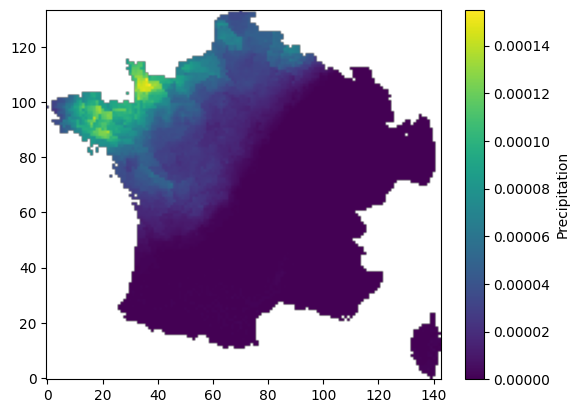

In [10]:
plt.imshow(ds_merged_pr_first, origin='lower')
plt.colorbar(label='Precipitation')
plt.show()

Nearest grid cell: 56 105
Latitude, Longitude: 45.519 6.17727136611938
1875-01-01 12:00:00    271.847382
1875-01-02 12:00:00    268.593567
1875-01-03 12:00:00    270.269196
1875-01-04 12:00:00    272.318085
1875-01-05 12:00:00    269.856995
                          ...    
1875-12-27 12:00:00    268.665680
1875-12-28 12:00:00    270.381348
1875-12-29 12:00:00    270.493439
1875-12-30 12:00:00    272.531586
1875-12-31 12:00:00    274.236786
Length: 365, dtype: float32


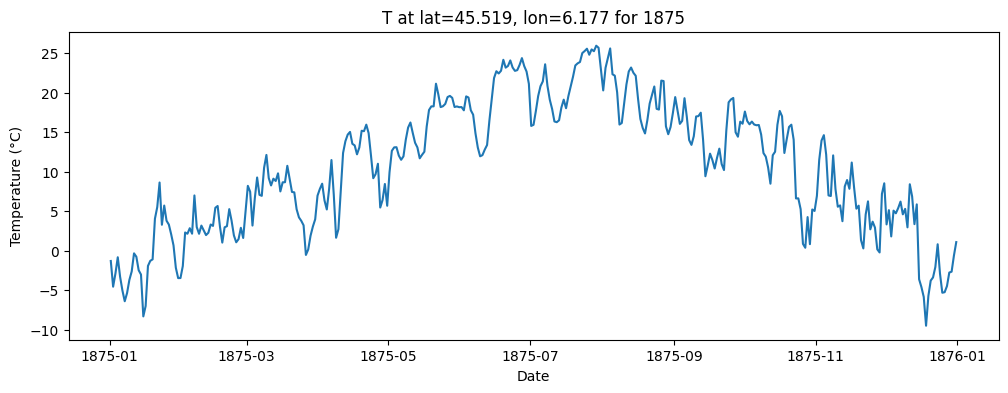

1875-01-01 12:00:00    0.000021
1875-01-02 12:00:00    0.000002
1875-01-03 12:00:00    0.000003
1875-01-04 12:00:00    0.000003
1875-01-05 12:00:00    0.000002
                         ...   
1875-12-27 12:00:00    0.000000
1875-12-28 12:00:00    0.000000
1875-12-29 12:00:00    0.000000
1875-12-30 12:00:00    0.000048
1875-12-31 12:00:00    0.000017
Length: 365, dtype: float32


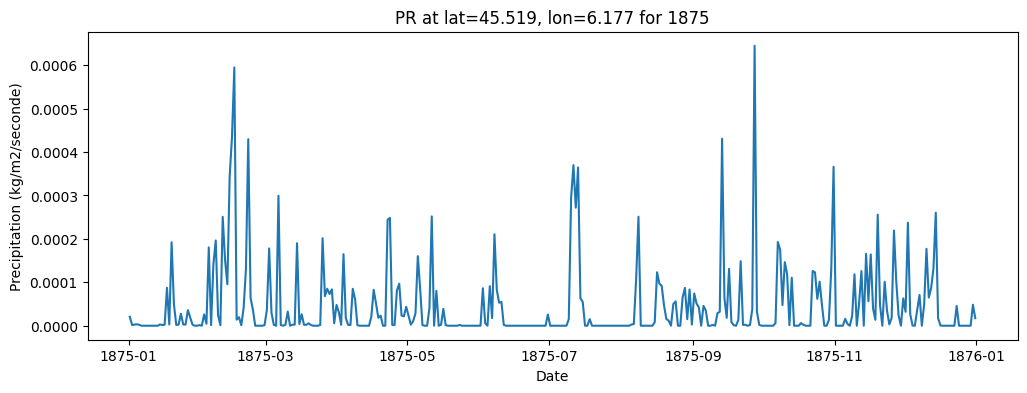

In [24]:
lat_target = 45.5
lon_target = 6.2

# distance field
dist2 = (ds_merged["lat"].values - lat_target)**2 + (ds_merged["lon"].values - lon_target)**2

# nearest point
y_idx, x_idx = np.unravel_index(np.argmin(dist2), dist2.shape)
print("Nearest grid cell:", y_idx, x_idx)
print("Latitude, Longitude:", ds_merged["lat"].values[y_idx, x_idx], ds_merged["lon"].values[y_idx, x_idx])

# extract time series
tas_ts = ds_merged["tasAdjust"].isel(y=y_idx, x=x_idx)
pr_ts  = ds_merged["prAdjust"].isel(y=y_idx, x=x_idx)


time_index = pd.to_datetime(tas_ts.time.values)

year = 1875

# Create a pandas Series with time as index
tas_ts_series = pd.Series(tas_ts.values, index=time_index)
pr_ts_series = pd.Series(pr_ts.values, index=time_index)

# Select only data for 2015
pr_ts_year = pr_ts_series[pr_ts_series.index.year == year]

tas_ts_year = tas_ts_series[tas_ts_series.index.year == year]
tas_ts_year_c = ts_year - 273.15

print(tas_ts_year)
plt.figure(figsize=(12,4))
plt.plot(tas_ts_year_c.index, tas_ts_year_c.values)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title(f"T at lat={ds_merged["lat"].values[y_idx,x_idx]:.3f}, lon={ds_merged["lon"].values[y_idx,x_idx]:.3f} for {year}")
plt.show()

print(pr_ts_year)
plt.figure(figsize=(12,4))
plt.plot(pr_ts_year.index, pr_ts_year.values)
plt.xlabel("Date")
plt.ylabel("Precipitation (kg/m2/seconde)")
plt.title(f"PR at lat={ds_merged["lat"].values[y_idx,x_idx]:.3f}, lon={ds_merged["lon"].values[y_idx,x_idx]:.3f} for {year}")
plt.show()




# # plot temperature
# plt.figure(figsize=(12,4))
# plt.plot(tas_ts.time, tas_ts.values, label="Temperature (°C)")
# plt.xlabel("Time")
# plt.title(f"T at lat={ds_merged["lat"].values[y_idx,x_idx]:.3f}, lon={ds_merged["lon"].values[y_idx,x_idx]:.3f}")
# plt.show()

# plt.figure(figsize=(12,4))
# plt.plot(pr_ts.time, pr_ts.values, label="Precipitation (mm/day)")
# plt.xlabel("Time")
# plt.title(f"PR at lat={ds_merged["lat"].values[y_idx,x_idx]:.3f}, lon={ds_merged["lon"].values[y_idx,x_idx]:.3f}")
# plt.show()


#### get yearly data

In [9]:
def get_yearly_data_at_loc(data_merged, year = 1875, lat_target= 45.5, lon_target= 6.2):
    # distance field
    dist2 = (data_merged["lat"].values - lat_target)**2 + (data_merged["lon"].values - lon_target)**2

    # nearest point
    y_idx, x_idx = np.unravel_index(np.argmin(dist2), dist2.shape)
    print("Nearest grid cell:", y_idx, x_idx)
    print("Latitude, Longitude:", data_merged["lat"].values[y_idx, x_idx], data_merged["lon"].values[y_idx, x_idx])

    # extract time series
    tas_ts = data_merged["tasAdjust"].isel(y=y_idx, x=x_idx)
    pr_ts  = data_merged["prAdjust"].isel(y=y_idx, x=x_idx)


    time_index = pd.to_datetime(tas_ts.time.values)

    # Create a pandas Series with time as index
    tas_ts_series = pd.Series(tas_ts.values, index=time_index)
    pr_ts_series = pd.Series(pr_ts.values, index=time_index)

    # Select only data for 2015
    pr_ts_year = pr_ts_series[pr_ts_series.index.year == year]

    tas_ts_year = tas_ts_series[tas_ts_series.index.year == year]
    tas_ts_year_c = tas_ts_year - 273.15

    print(tas_ts_year)
    plt.figure(figsize=(12,4))
    plt.plot(tas_ts_year_c.index, tas_ts_year_c.values)
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.title(f"T at lat={data_merged["lat"].values[y_idx,x_idx]:.3f}, lon={data_merged["lon"].values[y_idx,x_idx]:.3f} for {year}")
    plt.show()

    print(pr_ts_year)
    plt.figure(figsize=(12,4))
    plt.plot(pr_ts_year.index, pr_ts_year.values)
    plt.xlabel("Date")
    plt.ylabel("Precipitation (kg/m2/seconde)")
    plt.title(f"PR at lat={data_merged["lat"].values[y_idx,x_idx]:.3f}, lon={data_merged["lon"].values[y_idx,x_idx]:.3f} for {year}")
    plt.show()
    return tas_ts_year, pr_ts_year


Nearest grid cell: 56 105
Latitude, Longitude: 45.519 6.177271366119385
2050-01-01 12:00:00    276.432709
2050-01-02 12:00:00    275.678467
2050-01-03 12:00:00    276.416199
2050-01-04 12:00:00    278.464020
2050-01-05 12:00:00    277.623871
                          ...    
2050-12-27 12:00:00    273.890839
2050-12-28 12:00:00    273.261810
2050-12-29 12:00:00    272.665009
2050-12-30 12:00:00    274.050720
2050-12-31 12:00:00    272.111420
Length: 365, dtype: float32


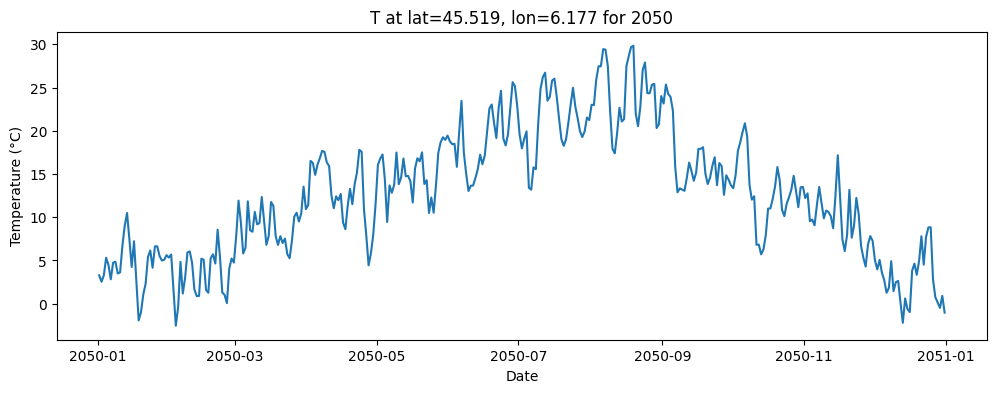

2050-01-01 12:00:00    0.000002
2050-01-02 12:00:00    0.000008
2050-01-03 12:00:00    0.000014
2050-01-04 12:00:00    0.000002
2050-01-05 12:00:00    0.000000
                         ...   
2050-12-27 12:00:00    0.000126
2050-12-28 12:00:00    0.000021
2050-12-29 12:00:00    0.000003
2050-12-30 12:00:00    0.000030
2050-12-31 12:00:00    0.000000
Length: 365, dtype: float32


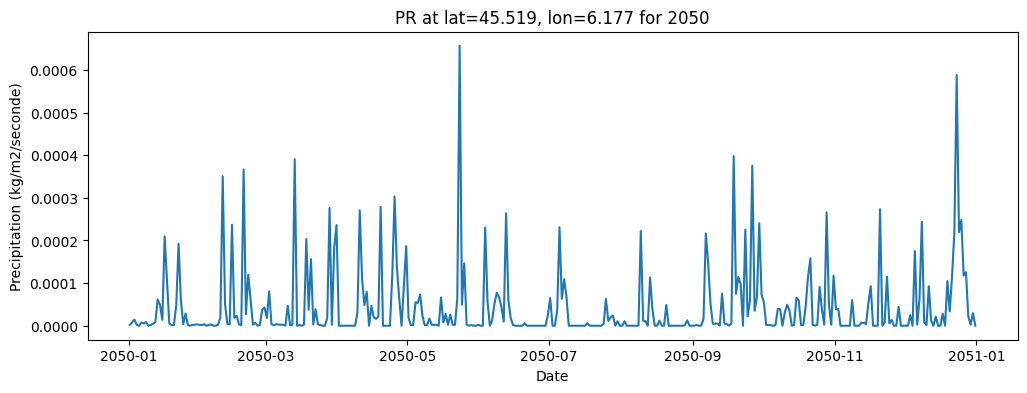

(2050-01-01 12:00:00    276.432709
 2050-01-02 12:00:00    275.678467
 2050-01-03 12:00:00    276.416199
 2050-01-04 12:00:00    278.464020
 2050-01-05 12:00:00    277.623871
                           ...    
 2050-12-27 12:00:00    273.890839
 2050-12-28 12:00:00    273.261810
 2050-12-29 12:00:00    272.665009
 2050-12-30 12:00:00    274.050720
 2050-12-31 12:00:00    272.111420
 Length: 365, dtype: float32,
 2050-01-01 12:00:00    0.000002
 2050-01-02 12:00:00    0.000008
 2050-01-03 12:00:00    0.000014
 2050-01-04 12:00:00    0.000002
 2050-01-05 12:00:00    0.000000
                          ...   
 2050-12-27 12:00:00    0.000126
 2050-12-28 12:00:00    0.000021
 2050-12-29 12:00:00    0.000003
 2050-12-30 12:00:00    0.000030
 2050-12-31 12:00:00    0.000000
 Length: 365, dtype: float32)

In [10]:
get_yearly_data_at_loc(ds_final, year = 2050)

#### Merge incendies avec historic data

In [3]:
path_data = '../data/incendies/'
incendies_file = 'incendies_V3.csv'

incendies_df = pd.read_csv(path_data+incendies_file)

In [4]:
incendies_df = incendies_df.rename(columns={
    "latitude": "x",
    "longitude": "y",
    "Date de première alerte": "time",
})


In [5]:
# Convert DataFrame → Dataset
ds_extra = incendies_df.set_index(["time", "x", "y"]).to_xarray()

# Merge
ds_merged = xr.merge([ds, ds_extra])

ValueError: cannot convert a DataFrame with a non-unique MultiIndex into xarray

In [ ]:
test = ds['time'].values


In [ ]:
print('hello')

#### Viz

In [ ]:
incendies_df.groupby(incendies_df['Année']).size()


Année
1973    2375
1974    1909
1975    2460
1976    2897
1977    1699
1978    4366
1979    4176
1980    3563
1981    3457
1982    2911
1983    2774
1984    2684
1985    3732
1986    2657
1987    2116
1988    2240
1989    3321
1990    3297
1991    2372
1992    2708
1993    2962
1994    2518
1995    2346
1996    1789
1997    2784
1998    2586
1999    2995
2000    2430
2001    2788
2002    1677
2003    3490
2004    2028
2005    1871
2006    3238
2007    2691
2008    1824
2009    3030
2010    2463
2011    2781
2012    2804
2013    1630
2014    1947
2015    2959
2016    2884
2017    3304
2018    1928
2019    2972
2020    2971
2021    2362
2022    4433
2023    2682
2024    1367
dtype: int64

In [ ]:
incendies_df.groupby(incendies_df['Année']).size()
